In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
pd.options.display.max_rows = 4000
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
iris = sns.load_dataset('iris')
X = iris.iloc[:,:-1].values
Y = iris.iloc[:,-1:].values
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

# Scaling

Scaling should be applied before applying dimension reduction.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

# PCA, KPCA and LDA objects are created.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel='rbf', gamma=45)
X_train_kpca = kpca.fit_transform(x_train)
X_test_kpca = kpca.fit_transform(x_test)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Modelling

In [5]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_pca =XGBClassifier()
xgb_kpca = XGBClassifier()
xgb_lda = XGBClassifier()

xgb.fit(X_train, y_train)
xgb_pca.fit(X_train_pca, y_train)
xgb_kpca.fit(X_train_kpca, y_train)
xgb_lda.fit(X_train_lda, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def model_evaluate(model, test):
    y_pred = model.predict(test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    categories = ['Setosa', 'Versicolor', 'Virginica']
    
    sns.heatmap(cm, cmap = 'Blues', fmt = '', annot = True,
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

# Comparison

### XGB Non Reduction

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.69      0.82        13
   virginica       0.60      1.00      0.75         6

    accuracy                           0.87        30
   macro avg       0.87      0.90      0.86        30
weighted avg       0.92      0.87      0.87        30



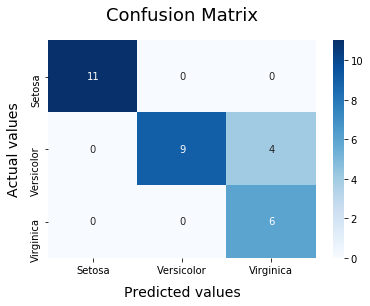

In [7]:
model_evaluate(xgb, X_test)

### XGB PCA

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.77      0.87        13
   virginica       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



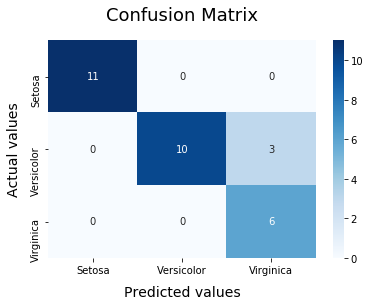

In [8]:
model_evaluate(xgb_pca, X_test_pca)

### XGB KPCA

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.77      0.87        13
   virginica       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



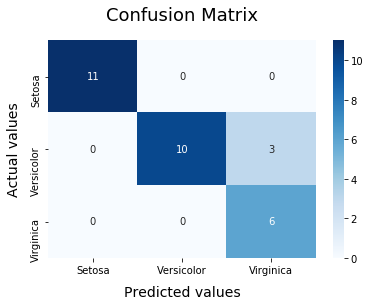

In [9]:
model_evaluate(xgb_pca, X_test_pca)

### XGB LDA

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.77      0.87        13
   virginica       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



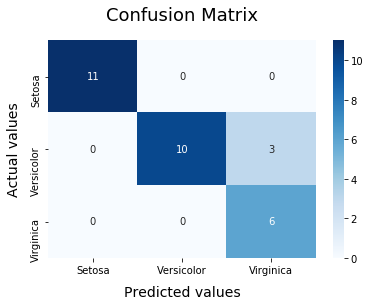

In [10]:
model_evaluate(xgb_pca, X_test_pca)